In [882]:
#Description: This programme predicts if passenger will survive on the titanic 

# Importing Libraries

In [883]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [884]:
import pandas as pd
train=pd.read_csv("train.csv")
train.head()
train.shape
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [885]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [886]:
#Train the missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [887]:
#train.dtypes
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Cleaning the data

Different variables: 
    
    Numerical : Age,fare, SibSp, Parch
    Catagorical:Sex,Embarked,Survived,Pclass
    Alphanumeric Features : Ticket, Cabin
    Text Features : Name
        
 We need to tweak these features so we get the desired form of input data       

In [888]:
#First lets count the number of missing values present in training and testing dataset
#train missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [889]:
#test missing values
testing.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Dealing with missing values

1.visualize the missing values

<AxesSubplot:>

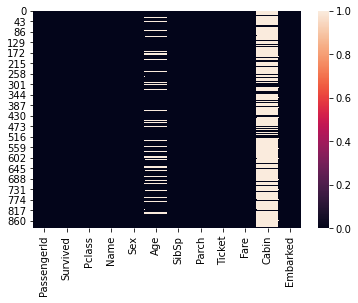

In [890]:
sns.heatmap(train.isnull())

# Lets fill the missing Values

# Imputer:

imputer class for completing the missing values

In [891]:
by_sex_class = train.groupby(['Sex', 'Pclass'])

In [892]:
def impute_median(series):
    return series.fillna(series.median())


In [893]:
train.Age = by_sex_class['Age'].transform(impute_median)

In [894]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

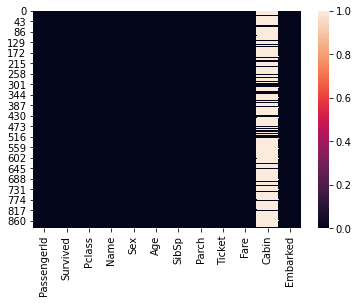

In [895]:
sns.heatmap(train.isnull())

In [896]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [897]:
#Use fillna to fill the Embarked missing value
train.Embarked.value_counts()
train.Embarked.fillna('S',inplace=True)

In [898]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [899]:
testing.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [900]:
train.isnull().sum()
testing.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [901]:
train.head()
testing.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [902]:
train.drop('Cabin',inplace=True,axis=1)

In [903]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [904]:
#Transforming the sex from object to int
train['Sex']=train.Sex.apply(lambda x:0 if x=='female' else 1)

In [905]:
train.Sex.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [906]:
train.head()
testing.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


# Remove Outliers

PassengerId       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Survived       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Pclass         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Sex               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Age            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
SibSp          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Parch                AxesSubplot(0.125,0.125;0.227941x0.222059)
Fare              AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

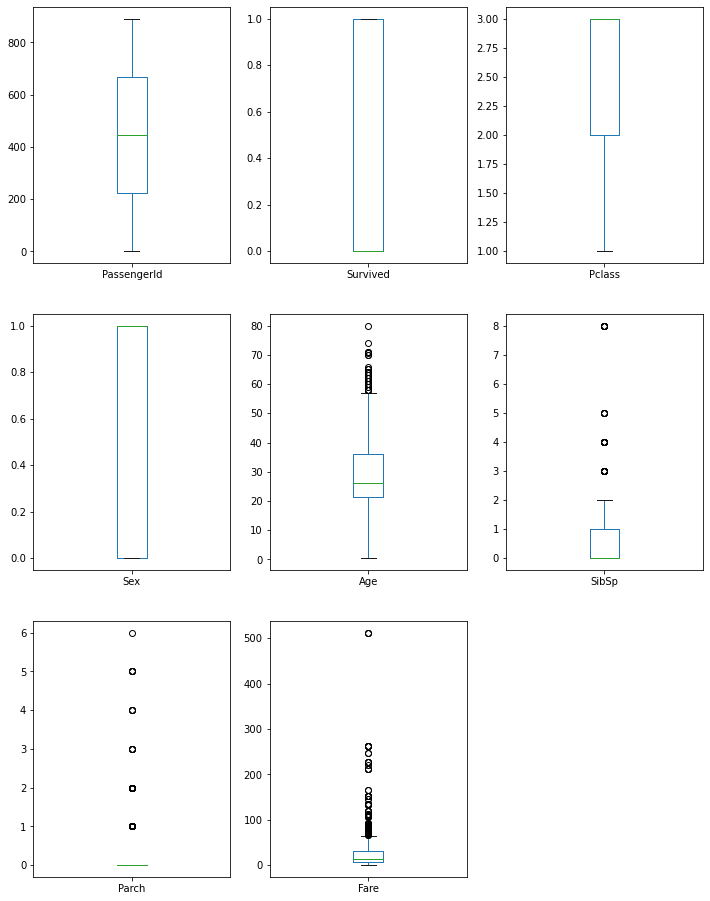

In [907]:
train.plot(kind='box',subplots=True,layout=(3,3),figsize=(12,16))

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

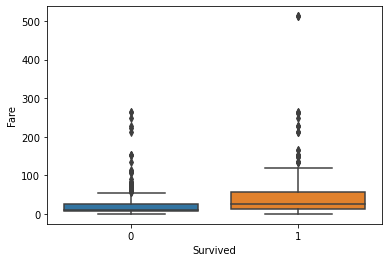

In [908]:
sns.boxplot(x='Survived',y='Fare',data=train)

# Removing outliers

In [909]:
#train['Fare']=train[train['Fare']<=400]

In [910]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [911]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [912]:
train['Embarked']=pd.factorize(train.Embarked)[0]

In [913]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [914]:
train.drop(['Ticket','Name'],axis=1,inplace=True)

In [915]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [916]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [917]:
train=train[train['Fare']<=400]

In [918]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Sex          888 non-null    int64  
 4   Age          888 non-null    float64
 5   SibSp        888 non-null    int64  
 6   Parch        888 non-null    int64  
 7   Fare         888 non-null    float64
 8   Embarked     888 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.4 KB


PassengerId       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Survived       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Pclass         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Sex               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Age            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
SibSp          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Parch                AxesSubplot(0.125,0.125;0.227941x0.222059)
Fare              AxesSubplot(0.398529,0.125;0.227941x0.222059)
Embarked          AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

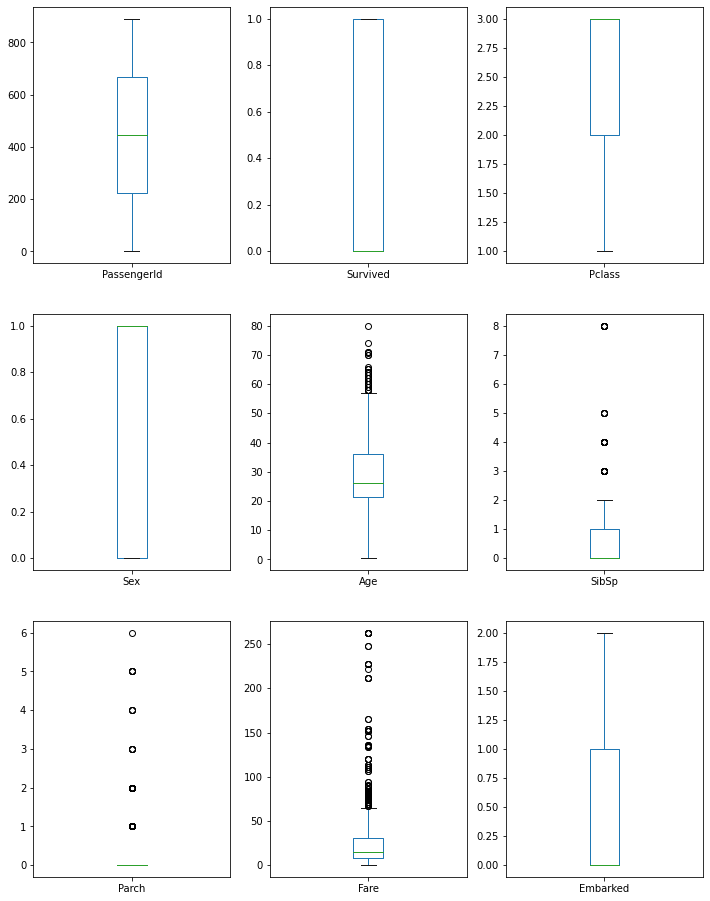

In [919]:
train.plot(kind='box',subplots=True,layout=(3,3),figsize=(12,16))

In [920]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Sex          888 non-null    int64  
 4   Age          888 non-null    float64
 5   SibSp        888 non-null    int64  
 6   Parch        888 non-null    int64  
 7   Fare         888 non-null    float64
 8   Embarked     888 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.4 KB


In [921]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(train))
threshold=3
new_train=train[(z<3).all(axis=1)]

In [922]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Sex          888 non-null    int64  
 4   Age          888 non-null    float64
 5   SibSp        888 non-null    int64  
 6   Parch        888 non-null    int64  
 7   Fare         888 non-null    float64
 8   Embarked     888 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.4 KB


PassengerId       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Survived       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Pclass         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Sex               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Age            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
SibSp          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Parch                AxesSubplot(0.125,0.125;0.227941x0.222059)
Fare              AxesSubplot(0.398529,0.125;0.227941x0.222059)
Embarked          AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

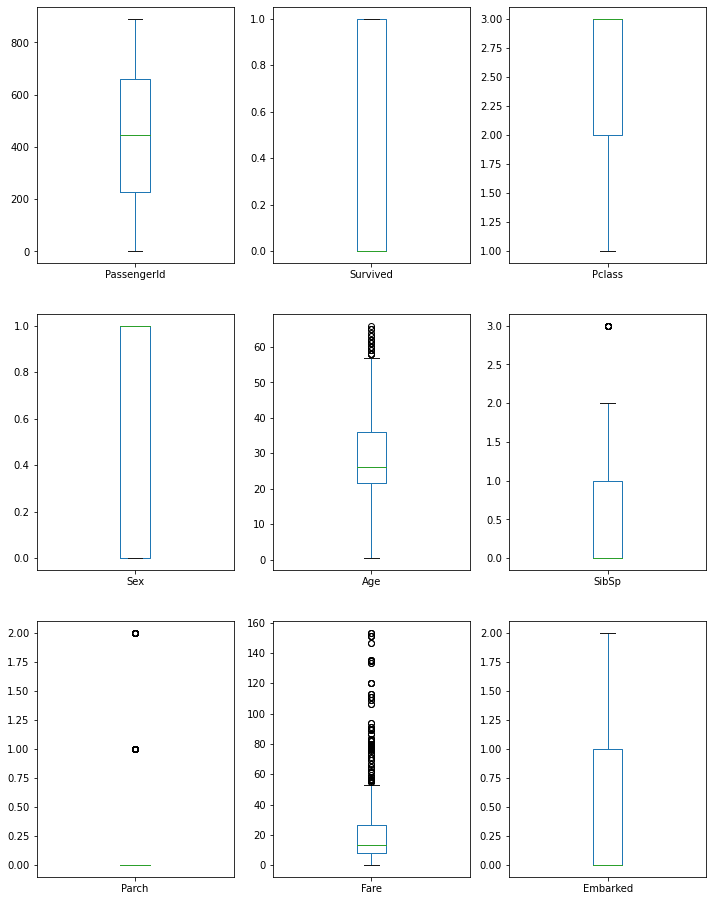

In [923]:
new_train.plot(kind='box',subplots=True,layout=(3,3),figsize=(12,16))

# Exploratory Data Analysis

In [924]:
new_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0
887,888,1,1,0,19.0,0,0,30.0000,0
888,889,0,3,0,21.5,1,2,23.4500,0
889,890,1,1,1,26.0,0,0,30.0000,1


In [925]:
print("Original shape=",train.shape,"\n","New shape : ", new_train.shape)

Original shape= (888, 9) 
 New shape :  (818, 9)


In [926]:
percentage_loss=((70)/891)*100   #1030-981=49
print(percentage_loss)

7.856341189674524


In [927]:
new_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,445.371638,0.388753,2.314181,0.658924,29.161577,0.348411,0.251834,25.496123,0.360636
std,255.081063,0.487765,0.825137,0.474361,12.485034,0.619653,0.562085,29.048709,0.636134
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,226.250000,0.000000,2.000000,0.000000,21.500000,0.000000,0.000000,7.895800,0.000000
50%,446.500000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,13.000000,0.000000
75%,660.750000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,26.550000,1.000000
max,891.000000,1.000000,3.000000,1.000000,66.000000,3.000000,2.000000,153.462500,2.000000


Generate descriptive statistics that summarize the central tendency

In [928]:
#Groupby "Survived"
new_train.groupby('Survived').mean()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,,
0,448.546000,2.524000,0.868000,29.978000,0.302000,0.164000,17.958548,0.304000
1,440.380503,1.984277,0.330189,27.877893,0.421384,0.389937,37.347655,0.449686


In [929]:
#groupby "sex"
new_train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,,
0,421.161290,0.763441,2.161290,27.145161,0.519713,0.444444,35.007334,0.483871
1,457.903525,0.194805,2.393321,30.205325,0.259740,0.152134,20.572880,0.296846


# Correlation matrix and heatmap

In [930]:
#Heatmap

In [931]:
new_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.015614,-0.025660,0.068328,0.012949,-0.054678,0.005203,-0.011801,-0.030645
Survived,-0.015614,1.000000,-0.319048,-0.553009,-0.082047,0.093974,0.196064,0.325568,0.111707
Pclass,-0.025660,-0.319048,1.000000,0.133391,-0.416084,-0.051568,-0.070519,-0.694434,0.068362
Sex,0.068328,-0.553009,0.133391,1.000000,0.116269,-0.199016,-0.246690,-0.235712,-0.139463
Age,0.012949,-0.082047,-0.416084,0.116269,1.000000,-0.153328,-0.255583,0.191565,-0.071546
SibSp,-0.054678,0.093974,-0.051568,-0.199016,-0.153328,1.000000,0.310050,0.251424,-0.027267
Parch,0.005203,0.196064,-0.070519,-0.246690,-0.255583,0.310050,1.000000,0.242951,-0.059190
Fare,-0.011801,0.325568,-0.694434,-0.235712,0.191565,0.251424,0.242951,1.000000,0.033576
Embarked,-0.030645,0.111707,0.068362,-0.139463,-0.071546,-0.027267,-0.059190,0.033576,1.000000


<AxesSubplot:>

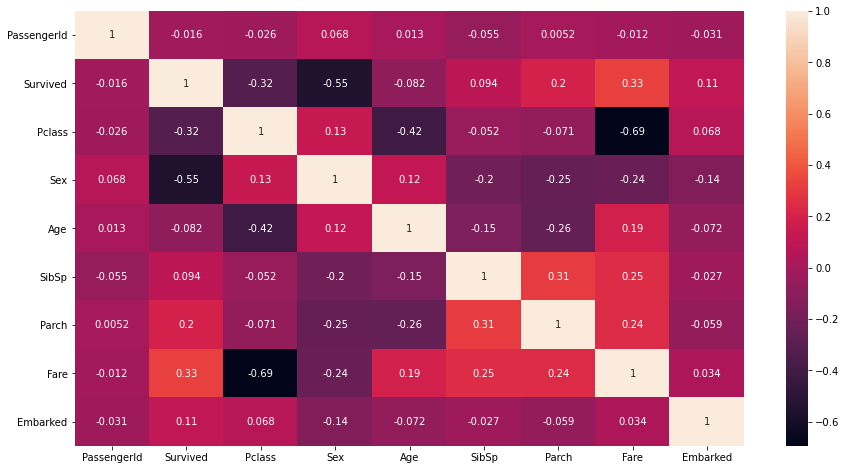

In [932]:
#Heatmap
plt.subplots(figsize=(15,8))
sns.heatmap(new_train.corr(),annot=True,)

# Create a variable Relation and visualize them

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

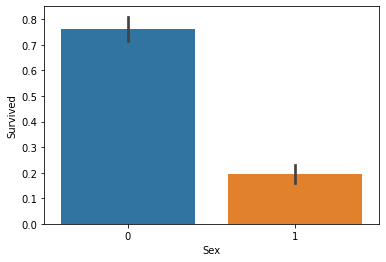

In [933]:
#Sex and Survived
sns.barplot(x='Sex',y='Survived',data=new_train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

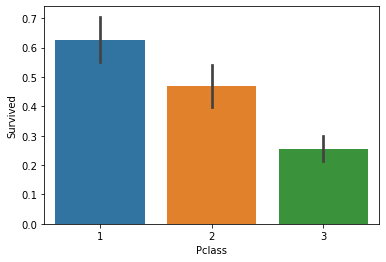

In [934]:
sns.barplot(x='Pclass',y='Survived',data=new_train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:948: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:991: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:948: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:991: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(


<AxesSubplot:xlabel='Age', ylabel='Density'>

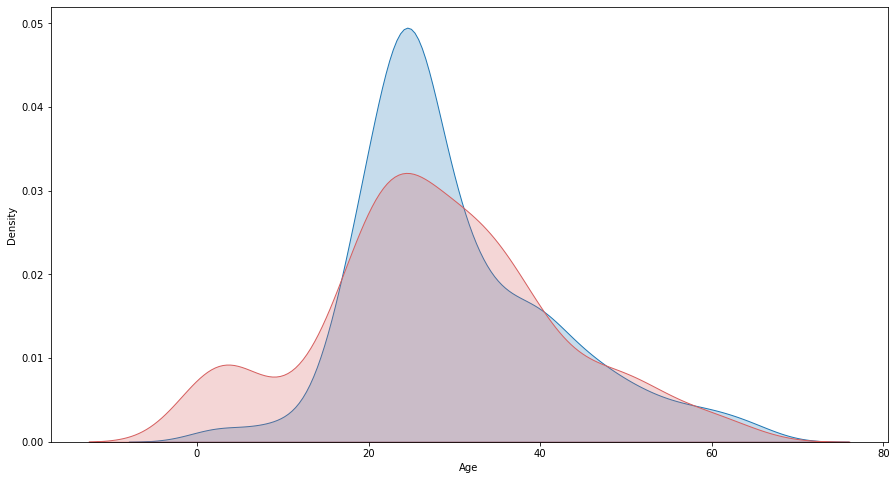

In [935]:
plt.subplots(figsize=(15,8))
sns.kdeplot(new_train.loc[(train['Survived']==0),'Age'],shade=True,Label='Not Survived')
sns.kdeplot(new_train.loc[(train['Survived']==1),'Age'],color='r',shade=True,Label='Survived')

# gathering Data

---gathering data

---Cleaning data

---Feature engineering

---Defining model

---Training,testing model and predicting the output

# Creating family_size feature

In [936]:
#Family size seems like a good feature to create
#SibSp
#Parch
new_train['family_size']=new_train['SibSp']+new_train['Parch']+1
new_train.head()
new_train.family_size.value_counts()

<ipython-input-936-0682b8108bfb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['family_size']=new_train['SibSp']+new_train['Parch']+1


1    524
2    155
3     98
4     28
5      9
6      4
Name: family_size, dtype: int64

In [937]:
#catagories according to the family_group
def family_group(size):
    a=''
    if (size<=1):
        a='alone'
    elif (size<=4):
        a='small'
    else:
        a='large'
    return a    
new_train['family_group']=new_train.family_size.map(family_group)  
new_train.head()

<ipython-input-937-c8671d604023>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['family_group']=new_train.family_size.map(family_group)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,family_group
0,1,0,3,1,22.0,1,0,7.2500,0,2,small
1,2,1,1,0,38.0,1,0,71.2833,1,2,small
2,3,1,3,0,26.0,0,0,7.9250,0,1,alone
3,4,1,1,0,35.0,1,0,53.1000,0,2,small
4,5,0,3,1,35.0,0,0,8.0500,0,1,alone


# catagories the age

In [938]:
def age_group(age):
    a=''
    if(age<=1):
        a='infant'
    elif (age<=4):
        a='toddler'
    elif (age<=14):
        a='child'
    elif(age<=15):
        a='teenager'
    elif (age<=25):
        a='adult'
    elif (age<=40):
        a='young-adult'
    elif (age<=55):
        a='middle age'
    else:
        a='old'
        
    return a    

In [939]:
new_train['age_group']=new_train.Age.map(age_group)
new_train.age_group.value_counts()

<ipython-input-939-43ee9d319596>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['age_group']=new_train.Age.map(age_group)


adult          334
young-adult    289
middle age     101
old             32
child           25
toddler         20
infant          12
teenager         5
Name: age_group, dtype: int64

In [940]:
new_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,family_group,age_group
0,1,0,3,1,22.0,1,0,7.2500,0,2,small,adult
1,2,1,1,0,38.0,1,0,71.2833,1,2,small,young-adult
2,3,1,3,0,26.0,0,0,7.9250,0,1,alone,young-adult
3,4,1,1,0,35.0,1,0,53.1000,0,2,small,young-adult
4,5,0,3,1,35.0,0,0,8.0500,0,1,alone,young-adult


# Catagorize fare

In [941]:
def fare_group(fare):
    a=''
    if(fare<=4):
        a='very-low'
    elif (fare<=10):
        a='low'
    elif (fare<=20):
        a='mid'
    elif(fare<=45):
        a='high'
    else:
        a='very high'
        
    return a 

new_train['fare_group']=new_train.Fare.map(fare_group)
new_train.fare_group.value_counts()

<ipython-input-941-fc09d24b1460>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['fare_group']=new_train.Fare.map(fare_group)


low          318
mid          176
high         175
very high    134
very-low      15
Name: fare_group, dtype: int64

In [942]:
new_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,family_group,age_group,fare_group
0,1,0,3,1,22.0,1,0,7.2500,0,2,small,adult,low
1,2,1,1,0,38.0,1,0,71.2833,1,2,small,young-adult,very high
2,3,1,3,0,26.0,0,0,7.9250,0,1,alone,young-adult,low
3,4,1,1,0,35.0,1,0,53.1000,0,2,small,young-adult,very high
4,5,0,3,1,35.0,0,0,8.0500,0,1,alone,young-adult,low


# Creating dummy variables

dummy variable is one that takes the value 0 or 1 to indicate the absence or presence of some catagorical effect

In [943]:
#Create dummies for 'Embarked','family_group','fare_group','age_group'
new_train=pd.get_dummies(new_train,columns=['Embarked','family_group','age_group','fare_group'],drop_first=True)

In [944]:
new_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,family_size,Embarked_1,...,age_group_infant,age_group_middle age,age_group_old,age_group_teenager,age_group_toddler,age_group_young-adult,fare_group_low,fare_group_mid,fare_group_very high,fare_group_very-low
0,1,0,3,1,22.0,1,0,7.2500,2,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,38.0,1,0,71.2833,2,1,...,0,0,0,0,0,1,0,0,1,0
2,3,1,3,0,26.0,0,0,7.9250,1,0,...,0,0,0,0,0,1,1,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,2,0,...,0,0,0,0,0,1,0,0,1,0
4,5,0,3,1,35.0,0,0,8.0500,1,0,...,0,0,0,0,0,1,1,0,0,0


In [945]:
new_train.shape

(818, 24)

In [946]:
#drop some unnecessary columns
new_train.drop(['family_size','Fare'],inplace=True,axis=1)

In [947]:
new_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_1,Embarked_2,family_group_large,...,age_group_infant,age_group_middle age,age_group_old,age_group_teenager,age_group_toddler,age_group_young-adult,fare_group_low,fare_group_mid,fare_group_very high,fare_group_very-low
0,1,0,3,1,22.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,38.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1,3,0,26.0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,4,1,1,0,35.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,5,0,3,1,35.0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


# Defining the model

I will train the data with the following models:
    .Logistic Regression
    
    .Gaussian Naive Bayes
    
    .Support Vector Machine
    
    .Decision Tree Classifier
    
    .K-Nearest Neighbors(KNN)
    
       .And Many More

In [948]:
#Prepare the dataset for training the model
x=new_train.drop('Survived',axis=1)
y=new_train['Survived']

# Classifier Comparision

In [949]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.metrics import accuracy_score,log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

classifiers=[                                   #Create a pipeline called classifier
    KNeighborsClassifier(3),
    svm.SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
log_cols=["Classifier","Acuracy"]
log=pd.DataFrame(columns=log_cols)

In [950]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split

SSplit=StratifiedShuffleSplit(test_size=0.3,random_state=7)
acc_dict={}

for train_index,test_index in SSplit.split(x,y):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    
    for clf in classifiers:
        name=clf.__class__.__name__
        
        clf.fit(x_train,y_train)
        predict=clf.predict(x_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc
        



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules

Text(0.5, 1.0, 'Classifier Accuracy')

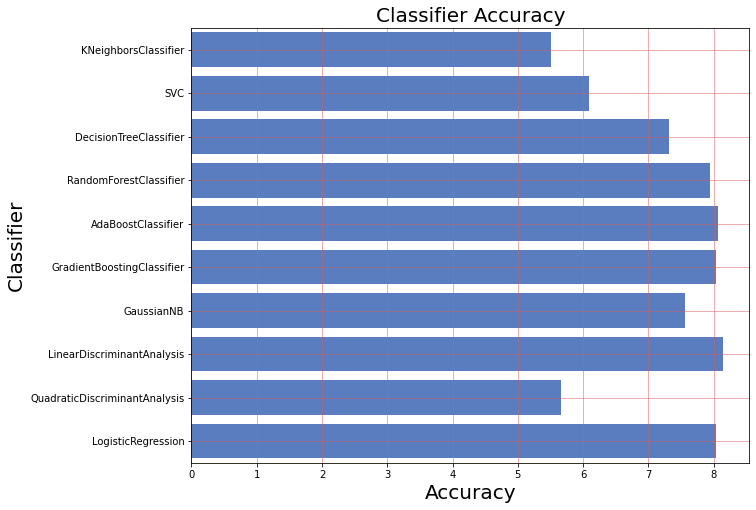

In [951]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2,3,4,5,6,7,8,9]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)